# Calling Dependencies

In [73]:
import pandas as pd     #packages for data analysis
import neattext as nt   #package for text cleaning
import seaborn as sns   #package for data visualization
from sklearn.feature_extraction.text import TfidfVectorizer  #for converting text into vectors

# Reading the Trainig and the Testing Data

In [74]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

### Shape of Training Data

In [75]:
df_train.shape

(256442, 6)

### Shape of Testing Data

In [76]:
df_test.shape

(64110, 5)

# Text Cleaning

# Removing Stopwords

In [12]:
df_train['title1_en']=df_train['title1_en'].apply(lambda x:nt.remove_stopwords(x))
df_train['title2_en']=df_train['title2_en'].apply(lambda x:nt.remove_stopwords(x))
df_test['title1_en']=df_test['title1_en'].apply(lambda x:nt.remove_stopwords(x))
df_test['title2_en']=df_test['title2_en'].apply(lambda x:nt.remove_stopwords(x))

# Fixing Contractions => don't -> do not

In [15]:
df_train['title1_en']=df_train['title1_en'].apply(lambda x:nt.fix_contractions(x))
df_train['title2_en']=df_train['title2_en'].apply(lambda x:nt.fix_contractions(x))
df_test['title1_en']=df_test['title1_en'].apply(lambda x:nt.fix_contractions(x))
df_test['title2_en']=df_test['title2_en'].apply(lambda x:nt.fix_contractions(x))

KeyboardInterrupt: 

# Removig Special Characters

In [16]:
df_train['title1_en']=df_train['title1_en'].apply(lambda x:nt.remove_special_characters(x))
df_train['title2_en']=df_train['title2_en'].apply(lambda x:nt.remove_special_characters(x))
df_test['title1_en']=df_test['title1_en'].apply(lambda x:nt.remove_special_characters(x))
df_test['title2_en']=df_test['title2_en'].apply(lambda x:nt.remove_special_characters(x))

# Remvoing Numbers

In [17]:
df_train['title1_en']=df_train['title1_en'].apply(lambda x:nt.remove_numbers(x))
df_train['title2_en']=df_train['title2_en'].apply(lambda x:nt.remove_numbers(x))
df_test['title1_en']=df_test['title1_en'].apply(lambda x:nt.remove_numbers(x))
df_test['title2_en']=df_test['title2_en'].apply(lambda x:nt.remove_numbers(x))

# Removing Punctuations

In [18]:
df_train['title1_en']=df_train['title1_en'].apply(lambda x:nt.remove_puncts(x))
df_train['title2_en']=df_train['title2_en'].apply(lambda x:nt.remove_puncts(x))
df_test['title1_en']=df_test['title1_en'].apply(lambda x:nt.remove_puncts(x))
df_test['title2_en']=df_test['title2_en'].apply(lambda x:nt.remove_puncts(x))

# Distribtution of Lable feature

C:\Users\Hi!_Imran_Nazir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

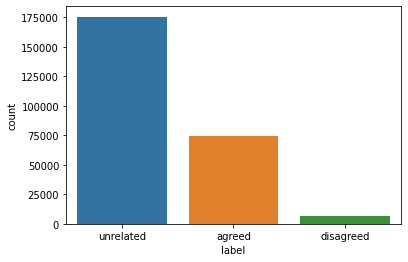

In [61]:
sns.countplot(df_train.label)

comments-> label feature is imbalanced

### joining title1_en and title2_en

In [51]:
df_train['Complete_Title']=df_train.title1_en+' '+df_train.title2_en
df_test['Complete_Title']=df_test.title1_en+' '+df_test.title2_en

# Converting Text Data into Vectors

In [54]:
vectorizer = TfidfVectorizer(max_features=4000)
X_train = vectorizer.fit_transform(df_train.Complete_Title)
X_test = vectorizer.fit_transform(df_test.Complete_Title)
y_train = df_train.label

# Balacing the Label Feature

In [64]:
from imblearn.over_sampling import SMOTE   #package foe balancing the data
sampler = SMOTE()
X_train, y_train = sampler.fit_resample(X_train, y_train)  #balancing trainig and testing data

### Balanced Data

C:\Users\Hi!_Imran_Nazir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

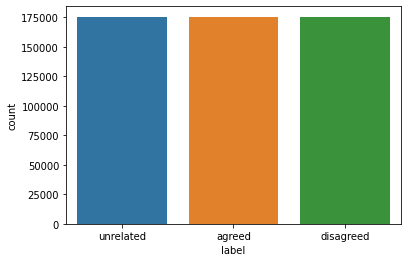

In [65]:
sns.countplot(y_train)

# Model Initialization

In [66]:
from sklearn.naive_bayes import MultinomialNB

# Model Training

In [67]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

# Testing Model on Training Data

In [68]:
model.score(X_train, y_train)

0.6883164956320686

# Confusion Matrix

In [58]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\Hi!_Imran_Nazir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


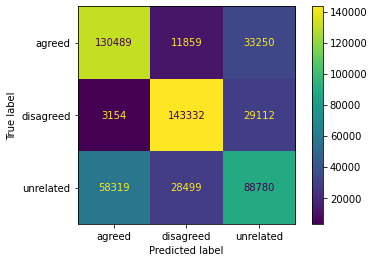

In [69]:
plot_confusion_matrix(model, X_train, y_train)

# Making Predictions on the Test Data

In [77]:
y_test = model.predict(X_test)

# Saving Predicted to Desired Format

In [72]:
pd.DataFrame({"id": df_test.id, "label": y_test}).to_csv("actual_pred")